In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [ ]:
url = "https://www.arabam.com/ikinci-el/otomobil/toyota-auris-1-4-d-4d-comfort-extra?city="
links = []

for i in range(15):
    url1 = url+str(i)+"&take=6&page=1"
    html = urlopen(url1)
    soup = BeautifulSoup(html, "html.parser")  
    href = [div.a.get('href') for div in soup.find_all(class_='pr10 fade-out-content-wrapper')]
    links.append(href)
    
for i in range(15):
    url2 = url+str(i)+"&take=6&page=2"
    html = urlopen(url2)
    soup = BeautifulSoup(html, "html.parser")  
    href2 = [div.a.get('href') for div in soup.find_all(class_='pr10 fade-out-content-wrapper')]
    links.append(href2)
    

In [104]:
links = [j for sub in links for j in sub]

In [105]:
link = []
for i, value in enumerate(links):
    get_url = "https://www.arabam.com" + value
    link.append(get_url)  
link

['https://www.arabam.com/ilan/sahibinden-satilik-toyota-auris-1-4-d-4d-comfort-extra/2012-toyota-auris-hasar-kaydi-yok-98-000km/18094503',
 'https://www.arabam.com/ilan/sahibinden-satilik-toyota-auris-1-4-d-4d-comfort-extra/sahibinden-toyota-auris-1-4-d-4d-comfort-extra-2010-model/18053440',
 'https://www.arabam.com/ilan/rent-a-car-dan-kiralik-toyota-auris-1-4-d-4d-comfort-extra/2010-toyota-auris-1-4d-d4-comfort-extra/18034165',
 'https://www.arabam.com/ilan/rent-a-car-dan-kiralik-toyota-auris-1-4-d-4d-comfort-extra/2012-toyota-auris-1-4d-d4-otomatik-vites-comfort-extra/18019519',
 'https://www.arabam.com/ilan/galeriden-satilik-toyota-auris-1-4-d-4d-comfort-extra/galeriden-toyota-auris-1-4-d-4d-comfort-extra-2012-model-adana/18014155',
 'https://www.arabam.com/ilan/sahibinden-satilik-toyota-auris-1-4-d-4d-comfort-extra/memurdan-servis-bakimli-garantisi-gecen-yil-bitti-dizel-otomatik-ici-bej-muayene-aku-yeni/18036618',
 'https://www.arabam.com/ilan/galeriden-satilik-toyota-auris-1-4-d-4

In [106]:
fiyat = []
konum = []
ozellik = []
for i, value in enumerate(link):
    link_html = urlopen(value)
    link_soup = BeautifulSoup(link_html, "html.parser")

    price = link_soup.find("span", {"class" : "color-red4 font-semi-big bold fl w66"})
    if price == None:
        price = link_soup.find("span", {"class" : "color-red4 font-semi-big bold fl "})
        if price == None:
            fiyat.append("None")
        else:
            fiyat.append(price.text) 
    else:
        fiyat.append(price.text)

    location = link_soup.find(class_ = "one-line-overflow font-default-minus pt4 color-black2018 bold")
    if location == None:
        konum.append("None")
    else:
        konum.append(location.text)
    info = link_soup.find("ul",{"class":"w100 cf mt16"})
    if info == None:
        ozellik.append("None")
    else:
        ozellik.append(info.text)


In [107]:
df = pd.DataFrame(list(zip(fiyat, konum, ozellik)), 
               columns =['Fiyat', 'Konum','Ozellik']) 


In [108]:
df = df[df.Ozellik != 'None'].reset_index()
loc = df["Konum"].str.split("/", n = 1, expand = True)
df.drop(columns=["Konum"], inplace=True)

In [109]:
loc.drop(columns=[1],inplace=True)

In [112]:
new = df["Ozellik"].str.split(":", n = 14, expand = True)


In [114]:
new["Marka"] = new[3].str.replace('Seri', '')
new["Seri"] = new[4].str.replace('Model', '')
new["Model"] = new[5].str.replace('Yıl', '')
new["Yıl"] = new[6].str.replace('Yakıt Tipi', '')
new['Yıl'] = [str(x)[:5] for x in new['Yıl']]
new["Yakıt_tipi"] = new[7].str.replace('Vites Tipi', '')
new["Vites_tipi"] = new[8].str.replace('Motor Hacmi', '')
new["Kilometre"] = new[11].str.replace('Boya-değişen', '')
new["Kilometre"] = new["Kilometre"].str.replace("km", "")
new["Kilometre"] = new["Kilometre"].str.replace(",", ".")
new["Kilometre"] = new["Kilometre"].str.replace("Plaka", "")
new["Kilometre"] = new["Kilometre"].str.replace("Şasi Numarası", "")


new["Fiyat"] = df["Fiyat"].str.replace(".", "")
new["Fiyat"] = new["Fiyat"].str.replace("TL", "")
new["Kilometre"] = new["Kilometre"].str.replace('.', '')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [115]:
new.drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], axis=1, inplace=True)
new

,Marka,Seri,Model,Yıl,Yakıt_tipi,Vites_tipi,Kilometre,Boya-değişen,Takasa_uygun,Kimden,Fiyat
0,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Düz,98000,- Şasi Numarası,- Boya-değişen,Belirtilmemiş Takasa Uygun: Takasa Uygun Değil...,102900
1,Toyota,Auris,1.4 D-4D Comfort Extra,2010,Dizel,Düz,141500,- Şasi Numarası,- Boya-değişen,Belirtilmemiş Takasa Uygun: Takasa Uygun Değil...,146500
2,Toyota,Auris,1.4 D-4D Comfort Extra,2010,Dizel,Düz,192000,- Şasi Numarası,-**************** Boya-değişen,Belirtilmemiş Takasa Uygun: Takasa Uygun Ki...,115850
3,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Yarı Otomatik,197000,- Şasi Numarası,-**************** Boya-değişen,Belirtilmemiş Takasa Uygun: Takasa Uygun Ki...,136850
4,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Yarı Otomatik,197000,djdhd************ Plaka,jejd Boya-değişen,"1 değişen, 2 boyalı Takasa Uygun: Takasa Uygun...",136850
5,Toyota,Auris,1.4 D-4D Comfort Extra,2011,Dizel,Yarı Otomatik,191000,- Şasi Numarası,- Boya-değişen,Belirtilmemiş Takasa Uygun: Takasa Uygun Ki...,137000
6,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Yarı Otomatik,219000,- Şasi Numarası,-**************** Boya-değişen,Belirtilmemiş Takasa Uygun: Takasa Uygun Ki...,172500
7,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Yarı Otomatik,96130,- Şasi Numarası,- Boya-değişen,1 boyalı Takasa Uygun: Takasa Uygun Değil K...,146500
8,Toyota,Auris,1.4 D-4D Comfort Extra,2011,Dizel,Yarı Otomatik,149800,06 CNA 6496 Şasi Numarası,111111111******** Boya-değişen,Belirtilmemiş Takasa Uygun: Takasa Uygun Ki...,145000
9,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Düz,187500,06DN Şasi Numarası,- Boya-değişen,"1 değişen, 4 boyalı Takasa Uygun: Takasa Uygun...",114000


In [121]:
del new["Boya-değişen"]
del new["Takasa_uygun"]
del new["Kimden"]
new


,Marka,Seri,Model,Yıl,Yakıt_tipi,Vites_tipi,Kilometre,Fiyat
0,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Düz,98000,102900
1,Toyota,Auris,1.4 D-4D Comfort Extra,2010,Dizel,Düz,141500,146500
2,Toyota,Auris,1.4 D-4D Comfort Extra,2010,Dizel,Düz,192000,115850
3,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Yarı Otomatik,197000,136850
4,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Yarı Otomatik,197000,136850
5,Toyota,Auris,1.4 D-4D Comfort Extra,2011,Dizel,Yarı Otomatik,191000,137000
6,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Yarı Otomatik,219000,172500
7,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Yarı Otomatik,96130,146500
8,Toyota,Auris,1.4 D-4D Comfort Extra,2011,Dizel,Yarı Otomatik,149800,145000
9,Toyota,Auris,1.4 D-4D Comfort Extra,2012,Dizel,Düz,187500,114000


In [ ]:
new.to_csv("datasets.xlsx")

In [2]:
import seaborn as sns
df = pd.read_excel("datasets.xlsx")
df

,Fiyat,Marka,Seri,Model,Yıl,Yakıt,Vites,Kilometre
0,105.000 TL,Toyota,Corolla,1.4 D-4D Elegant,2009,Dizel,Düz,310.000 km
1,141.500 TL,Toyota,Corolla,1.4 D-4D Elegant,2011,Dizel,Yarı Otomatik,188.100 km
2,135.000 TL,Toyota,Corolla,1.4 D-4D Elegant,2011,Dizel,Yarı Otomatik,217.000 km
3,143.000 TL,Toyota,Corolla,1.4 D-4D Elegant,2010,Dizel,Düz,97.000 km
4,113.000 TL,Toyota,Corolla,1.4 D-4D Elegant,2009,Dizel,Düz,275.000 km
...,...,...,...,...,...,...,...,...
1504,79.500 TL,Opel,Corsa,1.4 Enjoy,2004,LPG & Benzin,Yarı Otomatik,150.000 km
1505,90.000 TL,Opel,Corsa,1.4 Enjoy,2007,LPG & Benzin,Otomatik,155.000 km
1506,172.900 TL,Opel,Corsa,1.4 Enjoy,2019,Benzin,Otomatik,46.000 km
1507,142.500 TL,Opel,Corsa,1.4 Enjoy,2015,Benzin,Düz,70.500 km


In [ ]:
df["Kilometre"] = df["Kilometre"].str.replace("km", "")
df["Fiyat"] = df["Fiyat"].str.replace("TL", "")
df["Kilometre"] = df["Kilometre"].str.replace(".", "")
df["Fiyat"] = df["Fiyat"].str.replace(".", "")
df['Fiyat'] = df['Fiyat'].astype(float)
df['Kilometre'] = df['Kilometre'].astype(float)

In [4]:
df

,Fiyat,Marka,Seri,Model,Yıl,Yakıt,Vites,Kilometre
0,105000.0,Toyota,Corolla,1.4 D-4D Elegant,2009,Dizel,Düz,310000.0
1,141500.0,Toyota,Corolla,1.4 D-4D Elegant,2011,Dizel,Yarı Otomatik,188100.0
2,135000.0,Toyota,Corolla,1.4 D-4D Elegant,2011,Dizel,Yarı Otomatik,217000.0
3,143000.0,Toyota,Corolla,1.4 D-4D Elegant,2010,Dizel,Düz,97000.0
4,113000.0,Toyota,Corolla,1.4 D-4D Elegant,2009,Dizel,Düz,275000.0
...,...,...,...,...,...,...,...,...
1504,79500.0,Opel,Corsa,1.4 Enjoy,2004,LPG & Benzin,Yarı Otomatik,150000.0
1505,90000.0,Opel,Corsa,1.4 Enjoy,2007,LPG & Benzin,Otomatik,155000.0
1506,172900.0,Opel,Corsa,1.4 Enjoy,2019,Benzin,Otomatik,46000.0
1507,142500.0,Opel,Corsa,1.4 Enjoy,2015,Benzin,Düz,70500.0


In [5]:
df.shape

(1509, 8)

In [6]:
df.isnull().sum()

Fiyat        0
Marka        0
Seri         0
Model        0
Yıl          0
Yakıt        0
Vites        0
Kilometre    0
dtype: int64

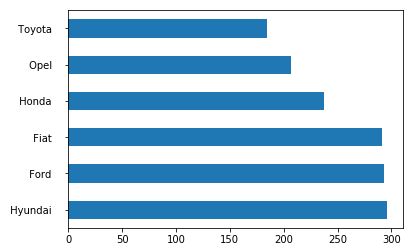

In [21]:
df["Marka"].value_counts().plot.barh();

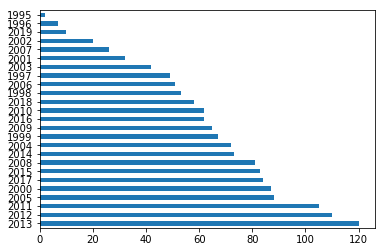

In [7]:
df["Yıl"].value_counts().plot.barh();

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


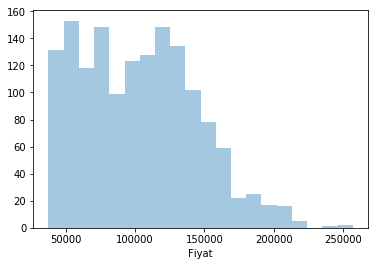

In [8]:
sns.distplot(df.Fiyat, kde = False);

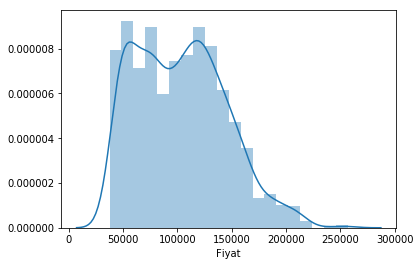

In [12]:
sns.distplot(df.Fiyat);

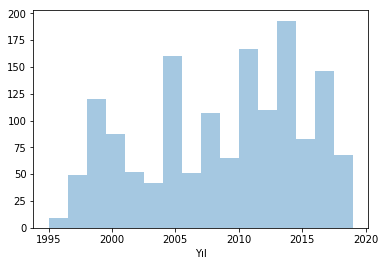

In [9]:
sns.distplot(df.Yıl, kde = False);

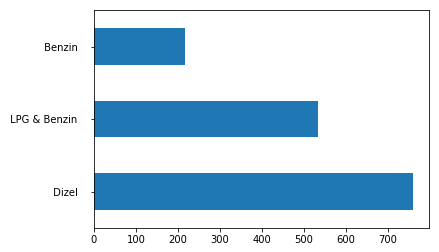

In [22]:
df["Yakıt"].value_counts().plot.barh();

In [23]:
df_table = df["Fiyat"]

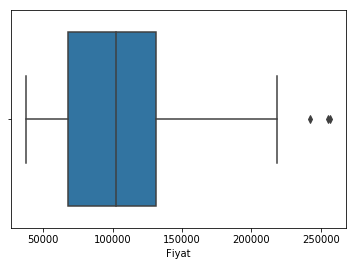

In [24]:
sns.boxplot(x = df_table);

In [25]:
df_table.head()

0    105000.0
1    141500.0
2    135000.0
3    143000.0
4    113000.0
Name: Fiyat, dtype: float64

In [26]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [27]:
Q1

67500.0

In [28]:
Q3

131000.0

In [29]:
IQR

63500.0

In [30]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [31]:
aykiri_tf= (df_table < alt_sinir) | (df_table > ust_sinir)

In [32]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: Fiyat, dtype: bool

In [33]:
df_table[aykiri_tf].index

Int64Index([652, 653, 663], dtype='int64')

In [34]:
for i in df_table[aykiri_tf].index:
    df.drop(i,inplace=True)

In [35]:
df.shape

(1506, 8)

In [36]:
df_table = pd.DataFrame(df_table)
df_table.shape

(1509, 1)

In [89]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [90]:
t_df.shape

(1506, 1)

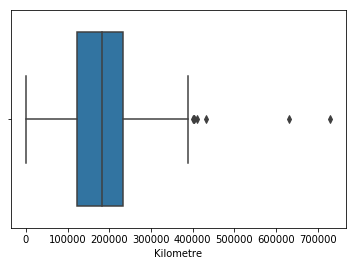

In [38]:
df_table = df["Kilometre"]
sns.boxplot(x = df_table);

In [39]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [40]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [41]:
aykiri_tf= (df_table < alt_sinir) | (df_table > ust_sinir)

In [42]:
df_table[aykiri_tf].index

Int64Index([225, 248, 361, 799, 858, 1079, 1365], dtype='int64')

In [43]:
for i in df_table[aykiri_tf].index:
    df.drop(i,inplace=True)

In [44]:
df.shape

(1499, 8)

In [71]:
a = df["Kilometre"]
b = df["Fiyat"]
aykiri_tf= (b >100000) & (a > 300000)
df[aykiri_tf].index

Int64Index([0, 72, 84, 123, 137, 149], dtype='int64')

In [73]:
for i in df[aykiri_tf].index:
    df.drop(i,inplace=True)

In [74]:
a = df["Yıl"]
b = df["Fiyat"]
aykiri_tf= (b >70000) & (a < 2000)
df[aykiri_tf].index

Int64Index([1364, 1366, 1370, 1393, 1405], dtype='int64')

In [75]:
for i in df[aykiri_tf].index:
    df.drop(i,inplace=True)

In [77]:
df.shape
df

,Fiyat,Marka,Seri,Model,Yıl,Yakıt,Vites,Kilometre
1,141500.0,Toyota,Corolla,1.4 D-4D Elegant,2011,Dizel,Yarı Otomatik,188100.0
2,135000.0,Toyota,Corolla,1.4 D-4D Elegant,2011,Dizel,Yarı Otomatik,217000.0
3,143000.0,Toyota,Corolla,1.4 D-4D Elegant,2010,Dizel,Düz,97000.0
4,113000.0,Toyota,Corolla,1.4 D-4D Elegant,2009,Dizel,Düz,275000.0
5,107900.0,Toyota,Corolla,1.4 D-4D Elegant,2008,Dizel,Düz,217000.0
...,...,...,...,...,...,...,...,...
1504,79500.0,Opel,Corsa,1.4 Enjoy,2004,LPG & Benzin,Yarı Otomatik,150000.0
1505,90000.0,Opel,Corsa,1.4 Enjoy,2007,LPG & Benzin,Otomatik,155000.0
1506,172900.0,Opel,Corsa,1.4 Enjoy,2019,Benzin,Otomatik,46000.0
1507,142500.0,Opel,Corsa,1.4 Enjoy,2015,Benzin,Düz,70500.0


In [78]:
df.reset_index()


,index,Fiyat,Marka,Seri,Model,Yıl,Yakıt,Vites,Kilometre
0,1,141500.0,Toyota,Corolla,1.4 D-4D Elegant,2011,Dizel,Yarı Otomatik,188100.0
1,2,135000.0,Toyota,Corolla,1.4 D-4D Elegant,2011,Dizel,Yarı Otomatik,217000.0
2,3,143000.0,Toyota,Corolla,1.4 D-4D Elegant,2010,Dizel,Düz,97000.0
3,4,113000.0,Toyota,Corolla,1.4 D-4D Elegant,2009,Dizel,Düz,275000.0
4,5,107900.0,Toyota,Corolla,1.4 D-4D Elegant,2008,Dizel,Düz,217000.0
...,...,...,...,...,...,...,...,...,...
1483,1504,79500.0,Opel,Corsa,1.4 Enjoy,2004,LPG & Benzin,Yarı Otomatik,150000.0
1484,1505,90000.0,Opel,Corsa,1.4 Enjoy,2007,LPG & Benzin,Otomatik,155000.0
1485,1506,172900.0,Opel,Corsa,1.4 Enjoy,2019,Benzin,Otomatik,46000.0
1486,1507,142500.0,Opel,Corsa,1.4 Enjoy,2015,Benzin,Düz,70500.0


In [ ]:
sns.pairplot(df, kind  ="reg");

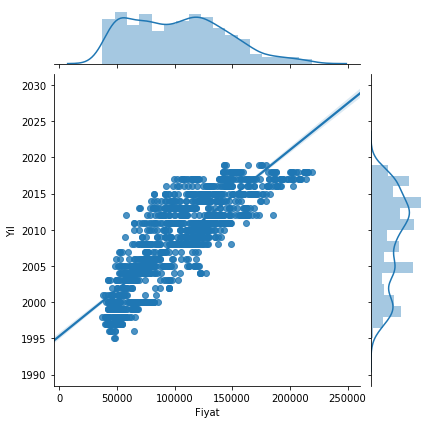

In [80]:
sns.jointplot(x = "Fiyat", y = "Yıl", data = df, kind = "reg")

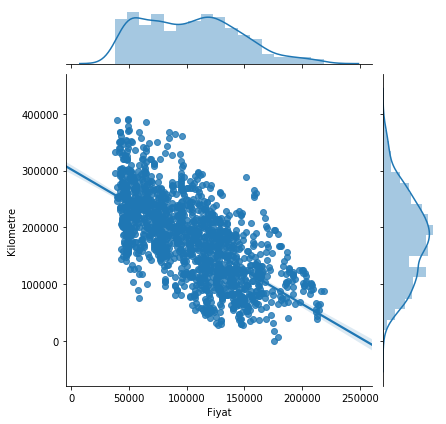

In [81]:
sns.jointplot(x = "Fiyat", y = "Kilometre", data = df, kind = "reg")

In [82]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()


In [83]:
df["Marka"] = le.fit_transform(df.Marka)

In [84]:
le.classes_

array([' Fiat   ', ' Ford   ', ' Honda   ', ' Hyundai   ', ' Opel   ',
       ' Toyota   '], dtype=object)

In [85]:
df.Marka.unique()

array([5, 0, 1, 2, 3, 4])

In [86]:
df["Seri"] = le.fit_transform(df.Seri)

In [87]:
le.classes_

array([' Accent   ', ' Astra   ', ' Civic   ', ' Corolla   ', ' Corsa   ',
       ' Fiesta   ', ' Focus   ', ' Jazz   ', ' Linea   ', ' Palio   ',
       ' i20   '], dtype=object)

In [88]:
df.Seri.unique()

array([ 3,  8,  9,  5,  6,  2,  7,  0, 10,  1,  4])

In [89]:
df["Model"] = le.fit_transform(df.Model)

In [90]:
le.classes_

array([' 1.2 EL   ', ' 1.2 MPI Style   ', ' 1.3 Admire   ',
       ' 1.3 CDTI Cosmo   ', ' 1.3 CDTI Enjoy   ',
       ' 1.3 Multijet Active Plus   ', ' 1.4 1.4i   ',
       ' 1.4 CRDi Jump   ', ' 1.4 D-4D Comfort   ',
       ' 1.4 D-4D Elegant   ', ' 1.4 EL   ', ' 1.4 Enjoy   ',
       ' 1.4 Fire Pop   ', ' 1.4 Fun   ', ' 1.4 TDCi Comfort   ',
       ' 1.5 GLS   ', ' 1.5 TDCi Trend   ', ' 1.5 TDCi Trend X   ',
       ' 1.6 CD   ', ' 1.6 LS   ', ' 1.6 TDCi Trend X   '], dtype=object)

In [91]:
df.Model.unique()

array([ 9,  8,  5, 12,  0, 14, 10, 16, 17, 20, 19,  6, 13,  2, 15,  7,  1,
        3, 18,  4, 11])

In [92]:
df["Yakıt"] = le.fit_transform(df.Yakıt)

In [93]:
le.classes_

array([' Benzin   ', ' Dizel   ', ' LPG & Benzin   '], dtype=object)

In [94]:
df.Yakıt.unique()

array([1, 2, 0])

In [95]:
df["Vites"] = le.fit_transform(df.Vites)

In [96]:
le.classes_

array([' Düz   ', ' Otomatik   ', ' Yarı Otomatik   '], dtype=object)

In [97]:
df.Vites.unique()

array([2, 0, 1])

In [98]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn import model_selection

In [99]:
X = df.drop(["Fiyat"], axis = 1)
y = df["Fiyat"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state = 42)

In [101]:
params = {"colsample_bytree":[0.4,0.5,0.6],
          "gamma":[0.1,0.2],
         "learning_rate":[0.01,0.02,0.05],
         "max_depth":[2,3,4,5],
         "n_estimators":[100,200,500,1000]}

In [102]:
xgb = XGBRegressor()

In [103]:
grid = GridSearchCV(xgb, params, cv =10, n_jobs = -1, verbose = 2)

In [104]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 14.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estim...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [105]:
grid.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 1000}

In [106]:
xgb1 = XGBRegressor(colsample_bytree = 0.6,learning_rate = 0.01, max_depth = 5, n_estimators = 1000)

In [107]:
model_xgb = xgb1.fit(X_train, y_train)

In [114]:
model_xgb.predict(X_test)[15:20]

array([ 48819.49, 120177.86, 140013.3 ,  78778.84, 130070.91],
      dtype=float32)

In [115]:
y_test[15:20]

499     49000.0
960    125500.0
78     142500.0
238     79500.0
52     127000.0
Name: Fiyat, dtype: float64

In [110]:
model_xgb.score(X_test, y_test)

0.9591446085339983

In [111]:
model_xgb.score(X_train, y_train)

0.9837824406629945

In [112]:
np.sqrt(-1*(cross_val_score(model_xgb, X_test, y_test, cv=10, scoring='neg_mean_squared_error'))).mean()

9454.807304325674

In [113]:
importance = pd.DataFrame({"Importance": model_xgb.feature_importances_},
                         index=X_train.columns)
importance

,Importance
Marka,0.101102
Seri,0.103811
Model,0.097050
Yıl,0.307879
Yakıt,0.213631
Vites,0.093907
Kilometre,0.082619


In [ ]:
import pickle
 
with open('predict.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)